# Introduction

The chosen algorithm for this project is: **Logistic Regression.**

Logistic regression is a simple, fast method for classification, most commonly binary classification (e.g., spam vs. not spam). Despite the name “regression,” its output is a probability (between 0 and 1), which you can turn into a class label.


# 7.1 Setup a Machine Learning Project
**Code:** Dummy Logistic Regression Function and Data Preprocessing  
This code defines a simple placeholder (dummy) function that imitates the behavior of Logistic Regression, loads the Breast Cancer dataset, and prepares it for testing.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from typing import List, Tuple

# -----------------------------
# 1. Dummy Logistic Regression Function
# -----------------------------
def predict_disease(features: List[float]) -> int:
    """
    Dummy function that imitates the behavior of a logistic regression model.
    Predicts 1 if average feature value > 0.5, else 0.
    """
    score = sum(features) / len(features)
    if score > 0.5:
        return 1  # "disease present"
    else:
        return 0  # "no disease"

# -----------------------------
# 2. Data Loading and Preprocessing
# -----------------------------
def load_and_preprocess_breast_cancer() -> Tuple[List[List[float]], List[int]]:
    """
    Loads and preprocesses the Breast Cancer dataset from scikit-learn.
    Returns the feature list and labels in a format suitable for the dummy model.
    """
    # Load dataset
    data = load_breast_cancer()
    X = data.data
    y = data.target.tolist()

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Convert to list of lists (for dummy function)
    X_processed = X_scaled.tolist()

    return X_processed, y

# -----------------------------
# 3. Run and Display Predictions
# -----------------------------
if __name__ == "__main__":
    # Load data
    X, y = load_and_preprocess_breast_cancer()

    # Get first 5 samples
    X_sample = X[:5]
    y_actual = y[:5]

    # Predict using dummy function
    y_pred = [predict_disease(features) for features in X_sample]

    # Print results
    print("First 5 Predictions vs Actual:")
    for i in range(5):
        print(f"Sample {i+1}: Predicted = {y_pred[i]}, Actual = {y_actual[i]}")

First 5 Predictions vs Actual:
Sample 1: Predicted = 1, Actual = 0
Sample 2: Predicted = 0, Actual = 0
Sample 3: Predicted = 1, Actual = 0
Sample 4: Predicted = 1, Actual = 0
Sample 5: Predicted = 1, Actual = 0


# 7.2 Understanding the ML Framework: Hypothesis, Loss, Optimizer
**Code:** Full Logistic Regression Implementation (NumPy Only)  
Implements Logistic Regression from scratch, defining the hypothesis function, Binary Cross-Entropy loss, and gradient descent optimizer to demonstrate the learning framework.


Epoch    0 | Loss: 0.6931
Epoch  100 | Loss: 0.2465
Epoch  200 | Loss: 0.1822
Epoch  300 | Loss: 0.1530
Epoch  400 | Loss: 0.1357
Epoch  500 | Loss: 0.1240
Epoch  600 | Loss: 0.1155
Epoch  700 | Loss: 0.1090
Epoch  800 | Loss: 0.1038
Epoch  900 | Loss: 0.0995

Model Accuracy on Test Set: 96.49%


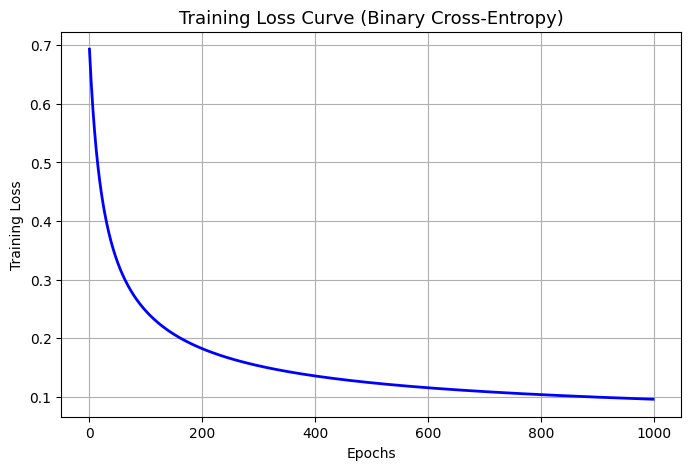

In [ ]:
# ============================================================
# LOGISTIC REGRESSION FROM SCRATCH (NUMPY ONLY)
# Includes Loss Curve Visualization
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# -----------------------------
# 1️⃣ DATA LOADING
# -----------------------------
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)

# -----------------------------
# 2️⃣ MANUAL FEATURE SCALING
# -----------------------------
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# -----------------------------
# 3️⃣ MANUAL TRAIN/TEST SPLIT
# -----------------------------
np.random.seed(42)
m = X_scaled.shape[0]
shuffle_idx = np.random.permutation(m)
train_size = int(0.8 * m)
train_idx = shuffle_idx[:train_size]
test_idx = shuffle_idx[train_size:]

X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# -----------------------------
# 4️⃣ CORE FUNCTIONS
# -----------------------------
def sigmoid(z):
    """Sigmoid activation"""
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w, b):
    """Hypothesis: ŷ = σ(w^T x + b)"""
    z = np.dot(X, w) + b
    return sigmoid(z)

def compute_loss(y_true, y_pred):
    """Binary Cross-Entropy Loss"""
    m = y_true.shape[0]
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    loss = - (1/m) * np.sum(y_true*np.log(y_pred) + (1 - y_true)*np.log(1 - y_pred))
    return loss

def gradient_descent(X, y, w, b, lr):
    """One step of Gradient Descent"""
    m = X.shape[0]
    y_pred = predict_proba(X, w, b)
    dw = (1/m) * np.dot(X.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)
    w -= lr * dw
    b -= lr * db
    return w, b

# -----------------------------
# 5️⃣ TRAINING LOOP (with loss recording)
# -----------------------------
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    b = 0.0
    loss_history = []

    for epoch in range(epochs):
        y_pred = predict_proba(X, w, b)
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)
        w, b = gradient_descent(X, y, w, b, lr)

        if epoch % 100 == 0:
            print(f"Epoch {epoch:4d} | Loss: {loss:.4f}")

    return w, b, loss_history

# -----------------------------
# 6️⃣ TRAIN MODEL
# -----------------------------
w_trained, b_trained, losses = train_logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

# -----------------------------
# 7️⃣ EVALUATE MODEL
# -----------------------------
y_pred_test_proba = predict_proba(X_test, w_trained, b_trained)
y_pred_test = (y_pred_test_proba >= 0.5).astype(int)
accuracy = np.mean(y_pred_test == y_test) * 100
print(f"\nModel Accuracy on Test Set: {accuracy:.2f}%")

# -----------------------------
# 8️⃣ PLOT TRAINING LOSS CURVE
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(range(len(losses)), losses, color='blue', linewidth=2)
plt.title("Training Loss Curve (Binary Cross-Entropy)", fontsize=13)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.grid(True)
plt.show()


# 7.4 Model Families and Information Theory
**Code:** Categorical Cross-Entropy Loss Demonstration (Multi-Class Example)  
Implements and demonstrates the categorical cross-entropy loss function using a small toy dataset to show how multi-class classification losses relate to information theory concepts.

In [ ]:
import numpy as np

# ---------------------------------------------------
# 1️⃣ Define the Categorical Cross-Entropy Loss Function
# ---------------------------------------------------
def categorical_cross_entropy(y_true, y_pred):
    """
    Compute Categorical Cross-Entropy Loss

    Parameters:
    -----------
    y_true : np.ndarray
        One-hot encoded true labels, shape = (n_samples, n_classes)
    y_pred : np.ndarray
        Predicted probabilities (from softmax), shape = (n_samples, n_classes)

    Returns:
    --------
    loss : float
        The average categorical cross-entropy loss across all samples
    """
    eps = 1e-15  # small constant to prevent log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)  # ensure numerical stability

    # Formula: L = - (1/N) * Σ Σ [ y_true * log(y_pred) ]
    loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    return loss

# ---------------------------------------------------
# 2️⃣ Create a Small Toy Dataset
# ---------------------------------------------------
# Suppose we have 3 samples and 3 possible classes (0, 1, 2)
# y_true = one-hot encoded true labels
y_true = np.array([
    [1, 0, 0],  # sample 1 belongs to class 0
    [0, 1, 0],  # sample 2 belongs to class 1
    [0, 0, 1]   # sample 3 belongs to class 2
])

# y_pred = model’s predicted probabilities for each class (from softmax)
y_pred = np.array([
    [0.7, 0.2, 0.1],  # model predicts mostly class 0 for sample 1
    [0.1, 0.8, 0.1],  # model predicts mostly class 1 for sample 2
    [0.2, 0.2, 0.6]   # model predicts mostly class 2 for sample 3
])

# ---------------------------------------------------
# 3️⃣ Compute and Print the Loss
# ---------------------------------------------------
loss_value = categorical_cross_entropy(y_true, y_pred)
print(f"Categorical Cross-Entropy Loss: {loss_value:.4f}")


Categorical Cross-Entropy Loss: 0.3635


# 7.5 Model Family Exploration
**Code:** Exploring Random Logistic Regression Models  
Generates 100 random Logistic Regression functions with different weights and biases, evaluates their accuracy on the Breast Cancer dataset, and visualizes the distribution of performance across the model family.

First 10 random model accuracies:
[44.99 64.85 47.63 29.   71.53 24.25 15.99 57.82 50.62 23.55]

Average Accuracy across 100 random models: 45.96%
Best Accuracy: 88.93%
Worst Accuracy: 9.49%


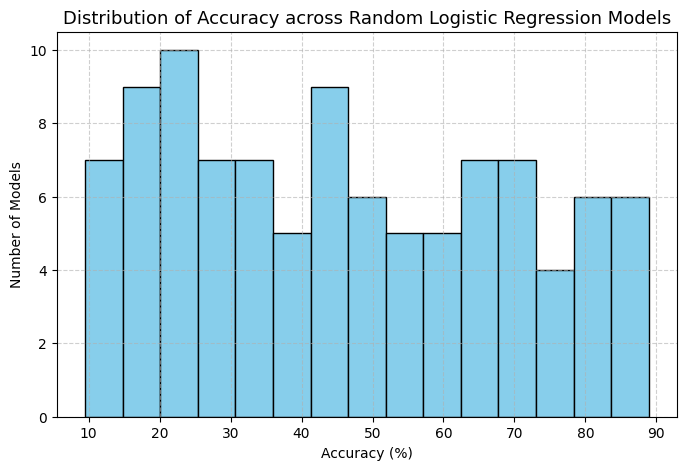

In [ ]:
# ============================================================
# EXPLORING A MODEL FAMILY (LOGISTIC REGRESSION)
# Using Random Parameter Samples (NumPy Only)
# ============================================================

import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# -----------------------------
# 1️⃣ LOAD AND STANDARDIZE DATA
# -----------------------------
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)

# Standardize (zero mean, unit variance)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# -----------------------------
# 2️⃣ DEFINE CORE FUNCTIONS
# -----------------------------
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w, b):
    """
    Logistic Regression hypothesis:
    ŷ = σ(wᵀx + b)
    """
    z = np.dot(X, w) + b
    return sigmoid(z)

# -----------------------------
# 3️⃣ EXPLORE THE MODEL FAMILY
# -----------------------------
np.random.seed(42)
n_features = X_scaled.shape[1]
n_samples = X_scaled.shape[0]
n_models = 100  # number of random models to sample

accuracies = []  # store all accuracy values

for i in range(n_models):
    # Randomly generate weights and bias
    w_random = np.random.randn(n_features, 1)  # random weight vector
    b_random = np.random.randn()               # random bias value

    # Compute model predictions
    y_pred_proba = predict_proba(X_scaled, w_random, b_random)

    # Convert probabilities to binary class predictions (0 or 1)
    y_pred = (y_pred_proba >= 0.5).astype(int)

    # Compute accuracy
    acc = np.mean(y_pred == y) * 100
    accuracies.append(acc)

# -----------------------------
# 4️⃣ DISPLAY RESULTS
# -----------------------------
# Print first few accuracy values
print("First 10 random model accuracies:")
print(np.round(accuracies[:10], 2))

# Print summary statistics
print("\nAverage Accuracy across 100 random models: {:.2f}%".format(np.mean(accuracies)))
print("Best Accuracy: {:.2f}%".format(np.max(accuracies)))
print("Worst Accuracy: {:.2f}%".format(np.min(accuracies)))

# -----------------------------
# 5️⃣ VISUALIZE DISTRIBUTION
# -----------------------------
plt.figure(figsize=(8,5))
plt.hist(accuracies, bins=15, color="skyblue", edgecolor="black")
plt.title("Distribution of Accuracy across Random Logistic Regression Models", fontsize=13)
plt.xlabel("Accuracy (%)")
plt.ylabel("Number of Models")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 7.6 Model Family (continued)
**Code:** Model Family Prediction Matrix and Correlation Analysis  
Constructs a 100×569 prediction matrix showing how different random models behave collectively. Computes variance and pairwise correlation to analyze prediction diversity.

 Model Family Statistical Summary
Number of models: 100
Number of samples: 569
Average mean of predicted probabilities: 0.494
Average variance of predicted probabilities: 0.163
Average pairwise correlation between models: 0.009


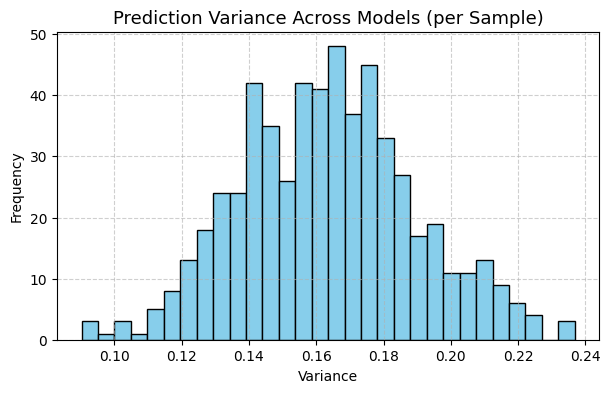

In [ ]:
# ============================================================
# MODEL FAMILY ANALYSIS IN LOGISTIC REGRESSION (NUMPY ONLY)
# Exploring diversity and similarity among random models
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# -----------------------------
# 1️⃣ LOAD AND STANDARDIZE DATA
# -----------------------------
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)
n_samples, n_features = X.shape

# Standardize features (zero mean, unit variance)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# -----------------------------
# 2️⃣ DEFINE CORE LOGISTIC FUNCTIONS
# -----------------------------
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w, b):
    """Logistic Regression hypothesis: ŷ = σ(wᵀx + b)"""
    z = np.dot(X, w) + b
    return sigmoid(z)

# -----------------------------
# 3️⃣ SAMPLE RANDOM MODELS (100 members of the family)
# -----------------------------
np.random.seed(42)
n_models = 100  # number of random (w, b) pairs

# Create a matrix to store predictions from all models
# Shape: (n_models, n_samples)
all_predictions = np.zeros((n_models, n_samples))

for i in range(n_models):
    # Random weight vector and bias
    w_random = np.random.randn(n_features, 1)
    b_random = np.random.randn()

    # Compute predicted probabilities for all samples
    y_pred_proba = predict_proba(X_scaled, w_random, b_random)

    # Store the predictions (flatten for consistency)
    all_predictions[i, :] = y_pred_proba.flatten()

# -----------------------------
# 4️⃣ ANALYZE THE MODEL FAMILY
# -----------------------------

# Mean and variance of predictions across models
mean_preds = np.mean(all_predictions, axis=0)
var_preds = np.var(all_predictions, axis=0)

# Average mean and variance across samples
avg_mean = np.mean(mean_preds)
avg_var = np.mean(var_preds)

# Pairwise correlation matrix (model similarity)
corr_matrix = np.corrcoef(all_predictions)

# -----------------------------
# 5️⃣ DISPLAY NUMERICAL RESULTS
# -----------------------------
print("=====================================================")
print(" Model Family Statistical Summary")
print("=====================================================")
print(f"Number of models: {n_models}")
print(f"Number of samples: {n_samples}")
print(f"Average mean of predicted probabilities: {avg_mean:.3f}")
print(f"Average variance of predicted probabilities: {avg_var:.3f}")

# Compute overall correlation statistics
mean_corr = np.mean(corr_matrix[np.triu_indices(n_models, k=1)])
print(f"Average pairwise correlation between models: {mean_corr:.3f}")
print("=====================================================")

# -----------------------------
# 6️⃣ VISUALIZE RESULTS
# -----------------------------

# 🔹 Histogram of prediction variances (diversity per sample)
plt.figure(figsize=(7,4))
plt.hist(var_preds, bins=30, color="skyblue", edgecolor="black")
plt.title("Prediction Variance Across Models (per Sample)", fontsize=13)
plt.xlabel("Variance")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 7.7 Model Training – Part 1
**Code:** Sampling Nearby Functions (f → f_new)  
Selects a random model and creates 100 “nearby” models by adding small random noise to the parameters, identifying the best-performing variant based on accuracy.

Exploring Nearby Logistic Regression Models
Initial (random) model accuracy: 44.99%
Best nearby model accuracy: 45.34%
Improvement achieved: 0.35%


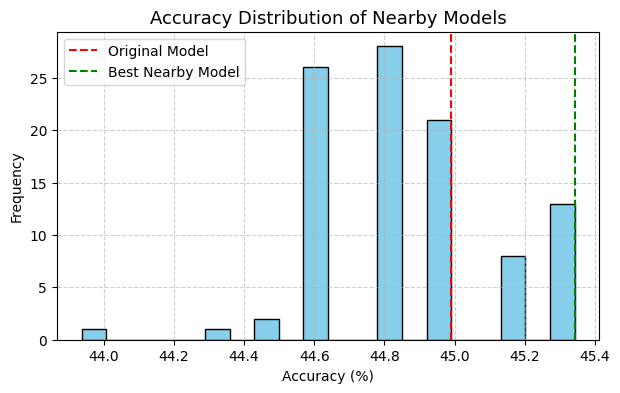

In [ ]:
# ============================================================
# MOVING FROM A RANDOM MODEL TO A SLIGHTLY BETTER ONE
# Demonstration of "nearby" models in the Logistic Regression family
# ============================================================

import numpy as np
from sklearn.datasets import load_breast_cancer

# -----------------------------
# 1️⃣ LOAD AND STANDARDIZE DATA
# -----------------------------
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)
n_samples, n_features = X.shape

# Standardize features for stability
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# -----------------------------
# 2️⃣ DEFINE CORE FUNCTIONS
# -----------------------------
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w, b):
    """Logistic Regression hypothesis: ŷ = σ(wᵀx + b)"""
    z = np.dot(X, w) + b
    return sigmoid(z)

def compute_accuracy(y_true, y_pred_proba):
    """Compute accuracy based on 0.5 threshold"""
    y_pred = (y_pred_proba >= 0.5).astype(int)
    return np.mean(y_pred == y_true) * 100

# -----------------------------
# 3️⃣ GENERATE INITIAL RANDOM MODEL
# -----------------------------
np.random.seed(42)

# Random initial weights and bias
w = np.random.randn(n_features, 1)
b = np.random.randn()

# Compute baseline accuracy
y_pred_proba = predict_proba(X_scaled, w, b)
orig_acc = compute_accuracy(y, y_pred_proba)

print("=====================================================")
print("Exploring Nearby Logistic Regression Models")
print("=====================================================")
print(f"Initial (random) model accuracy: {orig_acc:.2f}%")

# -----------------------------
# 4️⃣ CREATE 100 NEARBY MODELS
# -----------------------------
n_nearby = 100
accuracies = []

for i in range(n_nearby):
    # Add small Gaussian noise to weights and bias
    w_new = w + np.random.normal(0, 0.01, size=w.shape)
    b_new = b + np.random.normal(0, 0.01)

    # Compute accuracy for this nearby model
    y_pred_proba_new = predict_proba(X_scaled, w_new, b_new)
    acc_new = compute_accuracy(y, y_pred_proba_new)
    accuracies.append(acc_new)

# -----------------------------
# 5️⃣ FIND BEST NEARBY MODEL
# -----------------------------
best_acc = np.max(accuracies)
improvement = best_acc - orig_acc

print(f"Best nearby model accuracy: {best_acc:.2f}%")
print(f"Improvement achieved: {improvement:.2f}%")

print("=====================================================")

# Optional: Display a small summary
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(accuracies, bins=20, color="skyblue", edgecolor="black")
plt.axvline(orig_acc, color='red', linestyle='--', label='Original Model')
plt.axvline(best_acc, color='green', linestyle='--', label='Best Nearby Model')
plt.title("Accuracy Distribution of Nearby Models", fontsize=13)
plt.xlabel("Accuracy (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



# 7.7 Model Training – Part 2
**Code:** Naive Update Training Process  
Implements an iterative random-search training method that slightly adjusts model parameters over multiple iterations, accepting changes only when accuracy improves.

NAIVE UPDATE TRAINING DEMO (Logistic Regression)
Initial model accuracy: 44.99%
Iteration  20 | Current Accuracy: 46.05%
Iteration  40 | Current Accuracy: 46.40%
Iteration  60 | Current Accuracy: 46.40%
Iteration  80 | Current Accuracy: 46.40%
Iteration 100 | Current Accuracy: 46.40%
Iteration 120 | Current Accuracy: 46.40%
Iteration 140 | Current Accuracy: 46.40%
Iteration 160 | Current Accuracy: 46.40%
Iteration 180 | Current Accuracy: 46.40%
Iteration 200 | Current Accuracy: 46.40%
Final model accuracy: 46.40%
Total improvement: 1.41%


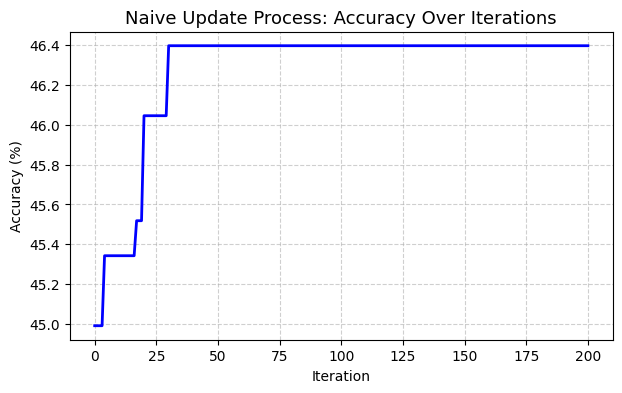

In [ ]:
# ============================================================
# NAIVE UPDATE PROCESS IN LOGISTIC REGRESSION
# Simple iterative improvement using random perturbations
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# -----------------------------
# 1️⃣ LOAD AND STANDARDIZE DATA
# -----------------------------
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)
n_samples, n_features = X.shape

# Standardize (zero mean, unit variance)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# -----------------------------
# 2️⃣ DEFINE CORE FUNCTIONS
# -----------------------------
def sigmoid(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w, b):
    """Logistic Regression hypothesis: ŷ = σ(wᵀx + b)"""
    z = np.dot(X, w) + b
    return sigmoid(z)

def compute_accuracy(y_true, y_pred_proba):
    """Compute classification accuracy using 0.5 threshold"""
    y_pred = (y_pred_proba >= 0.5).astype(int)
    return np.mean(y_pred == y_true) * 100

# -----------------------------
# 3️⃣ INITIAL RANDOM MODEL
# -----------------------------
np.random.seed(42)

# Random initial parameters
w = np.random.randn(n_features, 1)
b = np.random.randn()

# Compute baseline accuracy
y_pred_proba = predict_proba(X_scaled, w, b)
orig_acc = compute_accuracy(y, y_pred_proba)

print("=====================================================")
print("NAIVE UPDATE TRAINING DEMO (Logistic Regression)")
print("=====================================================")
print(f"Initial model accuracy: {orig_acc:.2f}%")

# -----------------------------
# 4️⃣ NAIVE ITERATIVE UPDATE LOOP
# -----------------------------
n_iterations = 200
step_size = 0.01  # how large each random step is
accuracies = [orig_acc]  # store accuracy per iteration

current_acc = orig_acc

for i in range(1, n_iterations + 1):
    # Propose new parameters (small random perturbation)
    w_new = w + np.random.normal(0, step_size, size=w.shape)
    b_new = b + np.random.normal(0, step_size)

    # Evaluate new model
    y_pred_proba_new = predict_proba(X_scaled, w_new, b_new)
    new_acc = compute_accuracy(y, y_pred_proba_new)

    # Accept the new model only if accuracy improves
    if new_acc > current_acc:
        w, b = w_new, b_new
        current_acc = new_acc

    # Record accuracy
    accuracies.append(current_acc)

    # Print progress every 20 iterations
    if i % 20 == 0:
        print(f"Iteration {i:3d} | Current Accuracy: {current_acc:.2f}%")

# -----------------------------
# 5️⃣ FINAL RESULTS
# -----------------------------
final_acc = current_acc
improvement = final_acc - orig_acc

print("=====================================================")
print(f"Final model accuracy: {final_acc:.2f}%")
print(f"Total improvement: {improvement:.2f}%")
print("=====================================================")

# -----------------------------
# 6️⃣ OPTIONAL: VISUALIZE ACCURACY OVER TIME
# -----------------------------
plt.figure(figsize=(7,4))
plt.plot(accuracies, color="blue", linewidth=2)
plt.title("Naive Update Process: Accuracy Over Iterations", fontsize=13)
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


# 7.7 Model Training – Part 3
**Code:** Logistic Regression Training with Gradient Descent  
Finalizes the project by implementing a proper optimizer. Trains the model using gradient descent and Binary Cross-Entropy loss, showing steady loss reduction and accuracy improvement.

Epoch  100 | Loss: 1.0608 | Accuracy: 69.24%
Epoch  200 | Loss: 0.5810 | Accuracy: 81.20%
Epoch  300 | Loss: 0.3593 | Accuracy: 87.17%
Epoch  400 | Loss: 0.2470 | Accuracy: 91.39%
Epoch  500 | Loss: 0.1878 | Accuracy: 93.50%
Epoch  600 | Loss: 0.1550 | Accuracy: 95.25%
Epoch  700 | Loss: 0.1350 | Accuracy: 96.13%
Epoch  800 | Loss: 0.1217 | Accuracy: 96.31%
Epoch  900 | Loss: 0.1127 | Accuracy: 96.84%
Epoch 1000 | Loss: 0.1064 | Accuracy: 97.19%
Final Loss: 0.1064
Final Accuracy: 97.19%


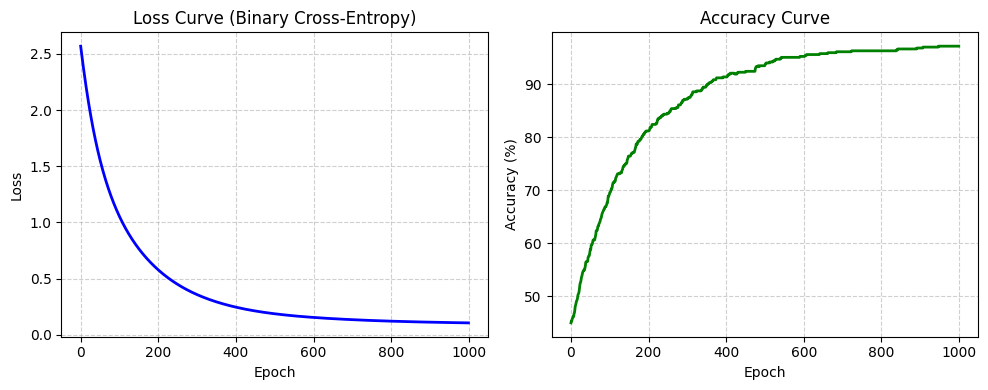

In [ ]:
# ============================================================
# LOGISTIC REGRESSION TRAINING WITH GRADIENT DESCENT (NUMPY ONLY)
# Demonstrates proper optimization using Binary Cross-Entropy loss
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# -----------------------------
# 1️⃣ LOAD AND STANDARDIZE DATA
# -----------------------------
data = load_breast_cancer()
X = data.data
y = data.target.reshape(-1, 1)
n_samples, n_features = X.shape

# Standardize features (zero mean, unit variance)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# -----------------------------
# 2️⃣ DEFINE CORE FUNCTIONS
# -----------------------------
def sigmoid(z):
    """Sigmoid activation"""
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w, b):
    """Model hypothesis: ŷ = σ(wᵀx + b)"""
    z = np.dot(X, w) + b
    return sigmoid(z)

def compute_loss(y_true, y_pred):
    """Binary Cross-Entropy (BCE) loss"""
    m = y_true.shape[0]
    eps = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    loss = -(1/m) * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

def compute_accuracy(y_true, y_pred_proba):
    """Accuracy with 0.5 threshold"""
    y_pred = (y_pred_proba >= 0.5).astype(int)
    return np.mean(y_pred == y_true) * 100

# -----------------------------
# 3️⃣ INITIALIZE PARAMETERS
# -----------------------------
np.random.seed(42)
w = np.random.randn(n_features, 1)
b = np.random.randn()

# Hyperparameters
alpha = 0.01    # learning rate
epochs = 1000   # number of iterations

# Lists to store progress
loss_history = []
acc_history = []

# -----------------------------
# 4️⃣ GRADIENT DESCENT TRAINING LOOP
# -----------------------------
for epoch in range(1, epochs + 1):
    # Forward pass
    y_pred = predict_proba(X_scaled, w, b)

    # Compute loss
    loss = compute_loss(y, y_pred)

    # Compute gradients
    m = y.shape[0]
    dw = (1/m) * np.dot(X_scaled.T, (y_pred - y))
    db = (1/m) * np.sum(y_pred - y)

    # Update parameters
    w -= alpha * dw
    b -= alpha * db

    # Compute accuracy
    acc = compute_accuracy(y, y_pred)

    # Store metrics
    loss_history.append(loss)
    acc_history.append(acc)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch:4d} | Loss: {loss:.4f} | Accuracy: {acc:.2f}%")

# -----------------------------
# 5️⃣ FINAL RESULTS
# -----------------------------
final_loss = loss_history[-1]
final_acc = acc_history[-1]
print("=====================================================")
print(f"Final Loss: {final_loss:.4f}")
print(f"Final Accuracy: {final_acc:.2f}%")
print("=====================================================")

# -----------------------------
# 6️⃣ VISUALIZE TRAINING CURVES
# -----------------------------
plt.figure(figsize=(10,4))

# Plot Loss Curve
plt.subplot(1, 2, 1)
plt.plot(loss_history, color='blue', linewidth=2)
plt.title("Loss Curve (Binary Cross-Entropy)", fontsize=12)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, linestyle="--", alpha=0.6)

# Plot Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(acc_history, color='green', linewidth=2)
plt.title("Accuracy Curve", fontsize=12)
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
